<a href="https://colab.research.google.com/github/HichamAbderrahim/TransformationLineaire/blob/main/TransformationLineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nous lisons et affichons l'image de l'utilisateur

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow 
from google.colab import files
import matplotlib.pyplot as plt

file_to_process = files.upload()

name, values = file_to_process.popitem()

img = cv.imread(name,cv.IMREAD_COLOR)

cv2_imshow(img)

Nous convertissons l'image en niveaux de gris

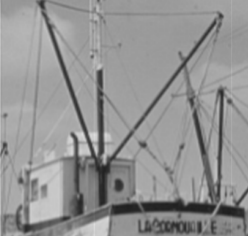

In [ ]:
gs = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gs)

Nous stockons la hauteur et la largeur de l'image afin de l'utiliser

In [ ]:
height = np.size(gs, 0)
width = np.size(gs, 1)

print("height :", height)
print("width :", width)


height : 236
width : 248


Nous recherchons la valeur minimale et maximale dans l'image

In [ ]:
maxI = -1
minI = 256
for i in range(height):
  for j in range(width):
    if gs[i,j] > maxI:
      maxI = gs[i,j]
    if gs[i,j] < minI:
      minI = gs[i,j]
print("max :", maxI)
print("min :", minI)

max : 220
min : 30


implantation de la méthode 1 (pas optimal)



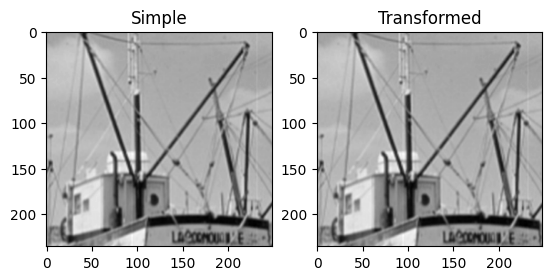

In [ ]:
gsT1 = np.zeros(shape=(height, width))
for i in range(height):
  for j in range(width):
    gsT1[i,j] = int(255 * (gs[i,j] - minI ) / (maxI - minI))

plt.subplot(1,2,1)
plt.title('Simple')
plt.imshow(gs, 'gray')

plt.subplot(1,2,2)
plt.title('Transformed')
plt.imshow(gsT1, 'gray')


Vérifiez la modification effectuée en comparant l'une des valeurs

In [ ]:
print(gsT1[50,50])
print(gs[50,50])

197.0
177


implantation de la méthode 2 (plus optimal)

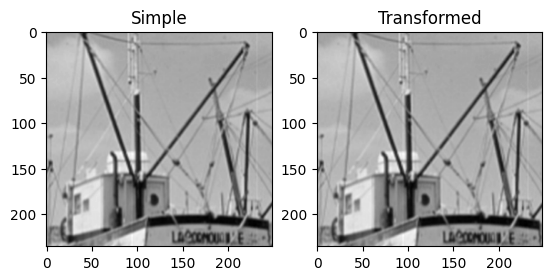

In [ ]:
LUT = [0] * 256
for i in range(256):
  LUT[i] = int(255 * (i - minI ) / (maxI - minI))

gsT2 = np.zeros(shape=(height, width))
for i in range(height):
  for j in range(width):
    gsT2[i,j] = LUT[gs[i,j]]


plt.subplot(1,2,1)
plt.title('Simple')
plt.imshow(gs, 'gray')

plt.subplot(1,2,2)
plt.title('Transformed')
plt.imshow(gsT2, 'gray')

Utilisez la méthode améliorée avec la possibilité de modifier la valeur du champ en niveaux de gris

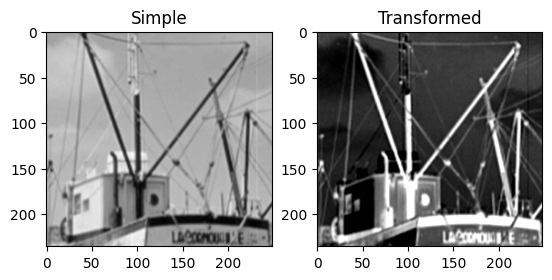

In [ ]:
# Ces valeurs peuvent être prises comme exemple
Smin = minI + 150 
Smax = maxI - 150

LUT = [0] * 256
for i in range(256):
  LUT[i] = int(255 * (i - Smin ) / (Smax - Smin))
  if LUT[i] < 0 :
    LUT[i] = 0
  elif LUT[i] > 255:
    LUT[i] = 255

gsT3 = np.zeros(shape=(height, width))
for i in range(height):
  for j in range(width):
    gsT3[i,j] = LUT[gs[i,j]]


plt.subplot(1,2,1)
plt.title('Simple')
plt.imshow(gs, 'gray')

plt.subplot(1,2,2)
plt.title('Transformed')
plt.imshow(gsT3, 'gray')